# Vehicle Recognizer

The goal of this project is to classify 28 different types of vehicle commonly around the world.
The types are following:

1. Van
2. Taxi
3. Police car
4. Bus
5. Ambulance
6. Skateboard
7. Baby carriage
8. Bicycle
9. Mountain bike
10. Scooter
11. Motorcycle
12. Fire engine
13. Crane
14. Forklift
15. Tractor
16. Recycling truck
17. Cement mixer
18. Dump truck
19. Subway
20. Aerial tramway
21. Helicopter
22. Airplane
23. Balloon
24. Tram
25. Carriage
26. Rowboat
27. Boat
28. Train

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
# !pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Vehicle Recognizer

/content/drive/My Drive/Bangladeshi Vehicle Recognizer


# Download Images from Browser

In [ ]:
doc(search_images_ddg)

In [ ]:
Vehicle_labels = [
    "Van",
    "Taxi",
    "Police car",
    "Bus",
    "Ambulance",
    "Skateboard",
    "Baby carriage",
    "Bicycle",
    "Mountain bike",
    "Scooter",
    "Motorcycle",
    "Fire engine",
    "Crane",
    "Forklift",
    "Tractor",
    "Recycling truck",
    "Cement mixer",
    "Dump truck",
    "Subway",
    "Aerial tramway",
    "Helicopter",
    "Airplane",
    "Balloon",
    "Tram",
    "Carriage",
    "Rowboat",
    "Boat",
    "Train",
]
len(Vehicle_labels)

28

In [ ]:
images = search_images_ddg(Vehicle_labels[1])
f"No. of Images => {len(images)} -- One Images URL => {images[0]}"

'No. of Images => 200 -- One Images URL => https://i.pinimg.com/originals/09/27/28/092728418188ccce2df6779c4c5276d4.jpg'

In [ ]:
doc(download_url)

In [ ]:
dest = "IMG_4794.jpg"
download_url(images[0], dest, show_progress=False)

Path('IMG_4794.jpg')

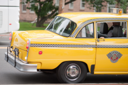

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

# Combine all of them

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for Vehicle_type in Vehicle_labels:
  dest = f"{data_path}/{Vehicle_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    Vehicle_image_urls = search_images_ddg(Vehicle_type)
    download_images(dest, urls = Vehicle_image_urls)
  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#5293) [Path('data/Van/db5b2bce-4eb8-4c0b-ae03-6c50b02acb55.jpg'),Path('data/Van/a486350a-ed74-4720-a3f5-39c67b3d89fc.jpg'),Path('data/Van/6c9a77b4-9850-442a-9492-f61d7cb0207a.jpg'),Path('data/Van/94ec4c21-d9c6-402f-9751-1268f40540ca.jpg'),Path('data/Van/b6124be9-6312-4a4a-af69-cbdcf6d2a503.jpg'),Path('data/Van/89db61be-0326-4d99-aeb9-1c7755f12b69.jpg'),Path('data/Van/5a90e369-8a44-425d-8031-d3d0f0d7ff71.JPG'),Path('data/Van/0d7a752b-4b4f-4434-abc3-5954dc4835b4.jpg'),Path('data/Van/2441a7ba-7207-46b9-8f43-f2cd96f49c4a.jpg'),Path('data/Van/7dbe56c9-cff5-440c-a5d7-248cc9510648.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#99) [Path('data/Van/c5e89e3e-ea26-4bdc-9180-186335697304.jpg'),Path('data/Van/c6d5d409-0aa8-40f1-b95d-f5bd6a1ec9c4.jpg'),Path('data/Van/0ee1e69c-6e38-43f3-9689-5edff6bfeaa8.jpg'),Path('data/Van/9ac71cc0-d28b-483d-9688-d0b198ba2e28.jpg'),Path('data/Van/c752a0fc-4751-40cc-992f-878a4151fd56.jpg'),Path('data/Van/f3dcdb3f-2564-4acc-a48f-7000fd8dd9b8.jpg'),Path('data/Taxi/83e6c161-e91f-4eec-bc27-db03ac58d0c3.jpg'),Path('data/Taxi/d768e5dc-6961-4b8b-83bc-eb32622723f7.jpg'),Path('data/Taxi/67d0d1d6-3b99-42ab-a557-8ea628f90f54.jpg'),Path('data/Taxi/b05ed96e-efbd-4814-8c1c-ef37e854c782.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#99) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


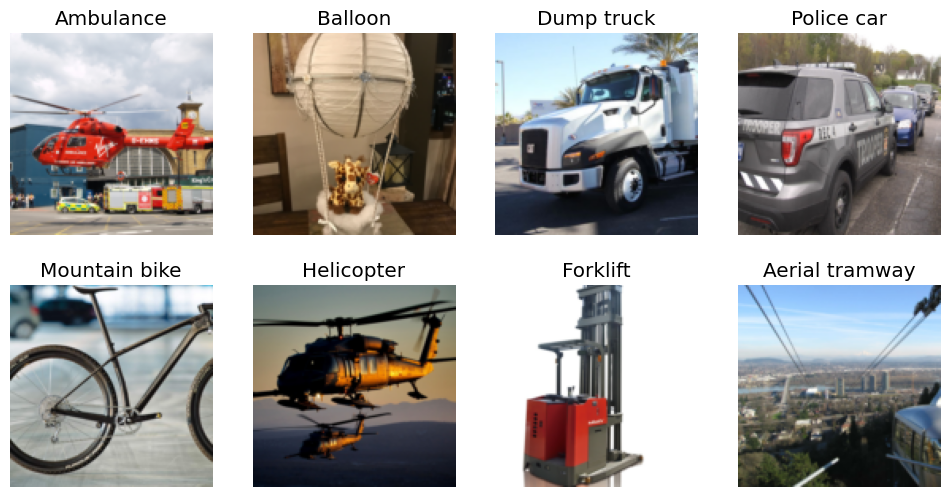

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

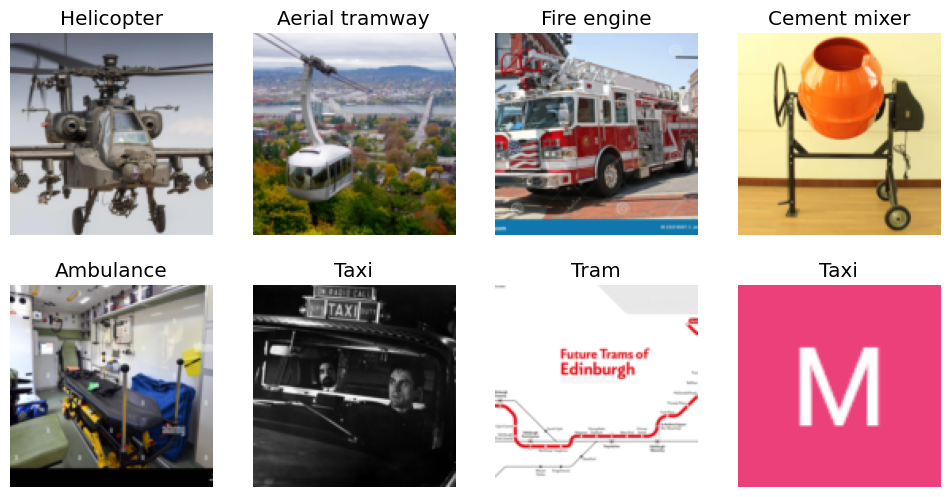

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


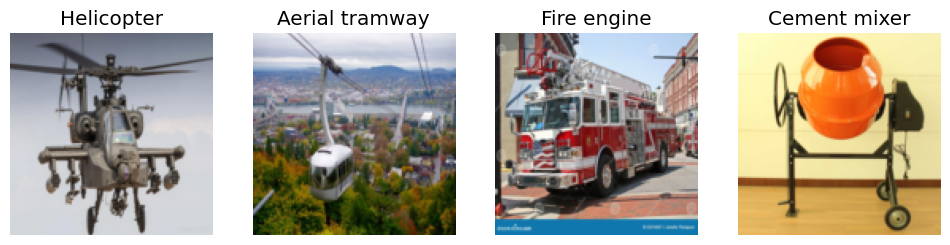

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

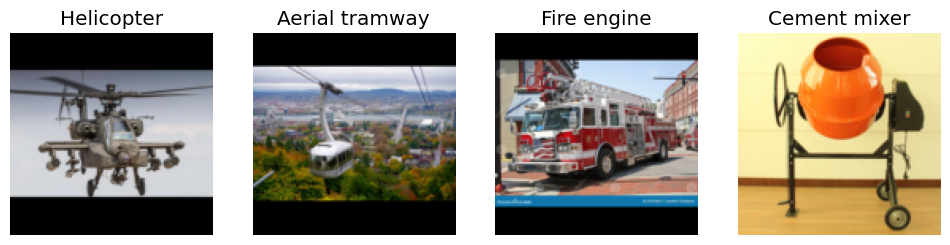

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

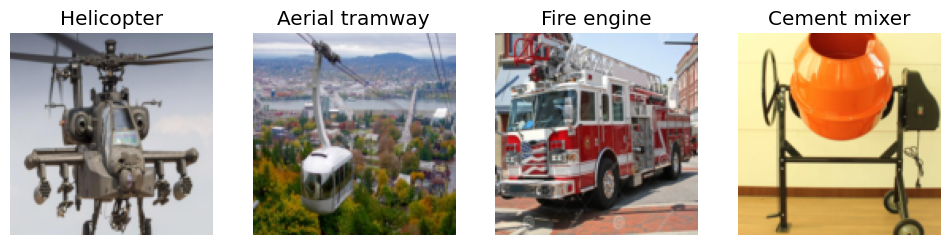

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)


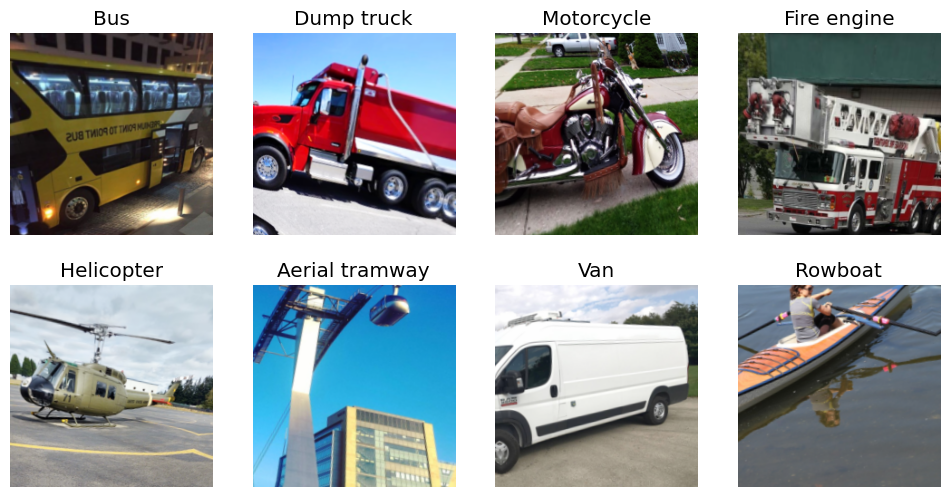

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "Vehicle_dataloader_v0.pkl")